In [1]:
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [2]:

import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# Exploring the data

In [6]:
df = pd.read_csv("/home/ubuntu/Desktop/Internship/Precily/all_category_data_merged.csv")
df.head(10)

,text,category
0,"CALM MELODIES AND BEAUTIFUL PICTURES Debussy, ...",art
1,Skip the art museum and come experience “Great...,art
2,Buy “Art: Music & Painting - Van Gogh on on Ca...,art
3,"Thank you for listening, I hope you will have ...",art
4,NaN,art
5,When watching this special episode of The Perf...,art
6,Sanjeev Abhyankar and Rakesh Chaurasia rendere...,art
7,"Michelangelo with Mozart, Renoir with Chopin, ...",art
8,Visit: http://www.uctv.tv/) Join the Director ...,art
9,"Wishing you better sleep, peaceful meditations...",art


# Dealing with nan values

In [7]:
df['text']=df['text'].fillna("")

In [8]:
df['text'].apply(lambda x: len(x.split(' '))).sum()

290586

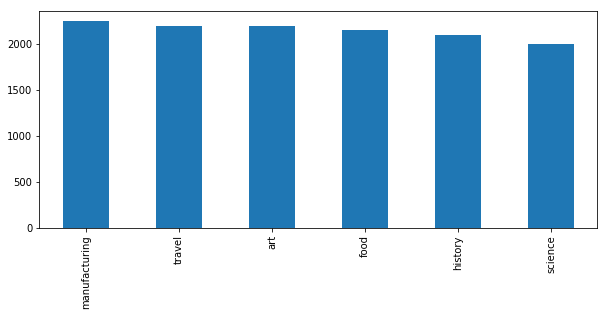

In [9]:
my_tags = ['food','manufacturing','science','travel','art','history']
plt.figure(figsize=(10,4))
df.category.value_counts().plot(kind='bar');

# Preprocessing Data

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [11]:
df['text'] = df['text'].apply(clean_text)

In [10]:
df['text'].apply(lambda x: len(x.split(' '))).sum()


184362

# Spliting Data

In [20]:
X = df.text
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Function to plot Classification Report

In [17]:
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

y = np.random.randint(low=0, high=10, size=100)
y_p = np.random.randint(low=0, high=10, size=100)

def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)



# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, Y_train)


accuracy 0.9790697674418605
               precision    recall  f1-score   support

         food       1.00      0.98      0.99       651
manufacturing       1.00      0.98      0.99       672
      science       1.00      0.98      0.99       626
       travel       1.00      0.94      0.97       668
          art       0.89      1.00      0.94       615
      history       1.00      1.00      1.00       638

    micro avg       0.98      0.98      0.98      3870
    macro avg       0.98      0.98      0.98      3870
 weighted avg       0.98      0.98      0.98      3870

CPU times: user 100 ms, sys: 4 ms, total: 104 ms
Wall time: 102 ms


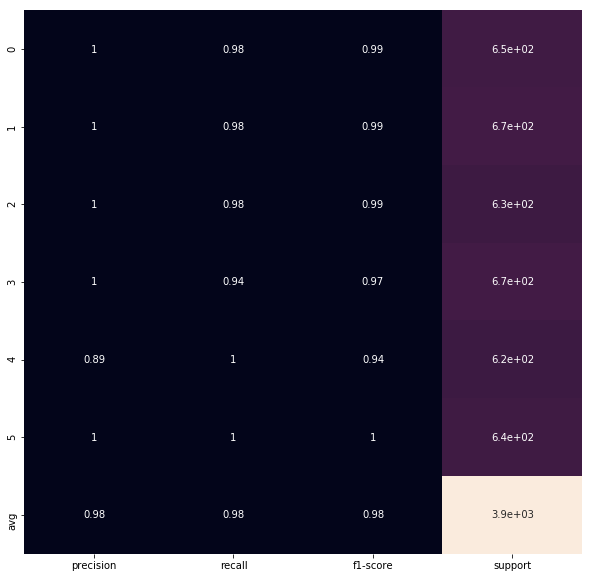

In [30]:
%%time

y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

plot_classification_report(y_test, y_pred)

# Bagging Model(Random Forest)

In [31]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier


rf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', (RandomForestClassifier(n_estimators=100))),
               ])
rf.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

accuracy 0.9785529715762273
               precision    recall  f1-score   support

         food       1.00      0.98      0.99       651
manufacturing       1.00      0.98      0.99       672
      science       1.00      0.98      0.99       626
       travel       1.00      0.94      0.97       668
          art       0.89      0.99      0.94       615
      history       0.99      1.00      1.00       638

    micro avg       0.98      0.98      0.98      3870
    macro avg       0.98      0.98      0.98      3870
 weighted avg       0.98      0.98      0.98      3870

CPU times: user 232 ms, sys: 0 ns, total: 232 ms
Wall time: 409 ms


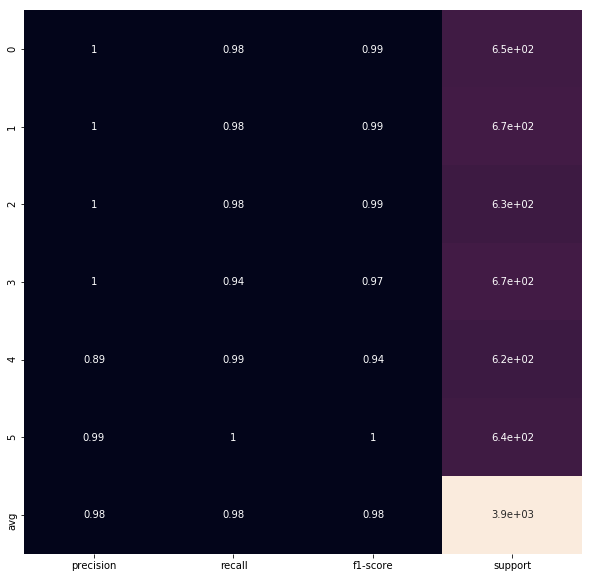

In [32]:
%%time

y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

plot_classification_report(y_test, y_pred)